In [37]:
import pandas as pd
Ti = pd.read_csv("C:\\Users\\hp\\AppData\\Local\\Temp\\Temp1_archive(7).zip\\train.csv")
Ti.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# Count the missing values
print(Ti.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [26]:
# since column 'Cabin' has the most missing values
Ti = Ti.drop(columns = 'Cabin')

In [27]:
# The other column is 'Age' with missing values replace it with the mean value
Ti['Age'] = Ti['Age'].fillna(Ti['Age'].mean)

In [28]:
# Calculate survival rate
print(Ti['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [29]:
# Calculatr survival rate in percentage
print(Ti['Survived'].value_counts(normalize=True))

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [30]:
import matplotlib.pyplot as plt
import pandas as pd
Survival_by_gender = Ti.groupby('Sex')['Survived'].mean()
print(Survival_by_gender)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Text(0.5, 1.0, 'Survival Rate by Gender')

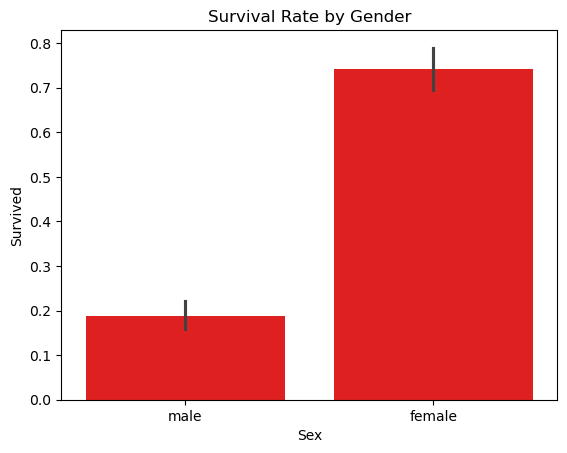

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.barplot(x = 'Sex', y = 'Survived', data= Ti, color='red')
plt.title('Survival Rate by Gender')

In [32]:
# Calculate survival rate by class
import matplotlib.pyplot as plt
import pandas as pd
Survival_by_Class = Ti.groupby('Pclass')['Survived'].mean()
print(Survival_by_Class)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


Text(0.5, 1.0, 'Survival Rate by Class')

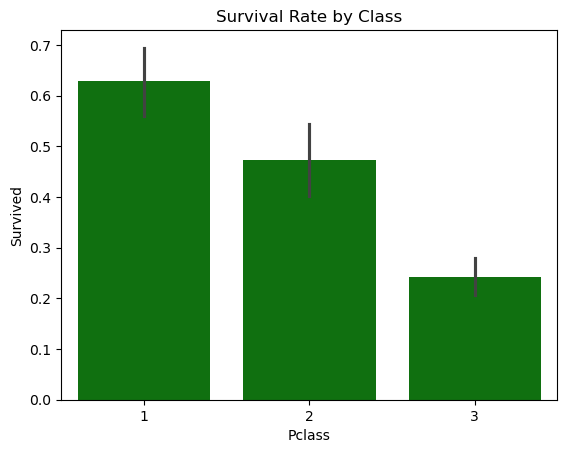

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.barplot(x ='Pclass', y= 'Survived', data= Ti, color= 'green')
plt.title('Survival Rate by Class')

In [39]:
# Define age bins and labels
bins = [0, 12, 18, 40, 60, 100]
labels = ['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Senior']
# Create a new column for Agegroup
Ti['Agegroup'] = pd.cut(Ti['Age'], bins=bins, labels=labels)
print(Ti.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Agegroup'],
      dtype='object')


Text(0.5, 1.0, 'Survival Rate by Agegroup')

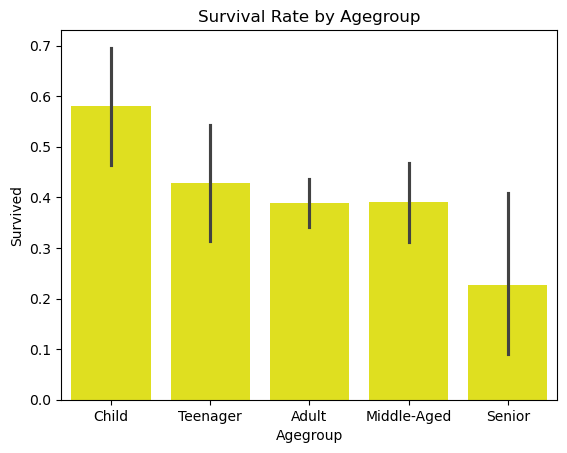

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.barplot(x = 'Agegroup', y = 'Survived', data = Ti, color = 'yellow')
plt.title('Survival Rate by Agegroup')

In [ ]:
# drop irrelevant clolumns)
Ti = Ti.drop(columns= ['Cabin', 'Name'])

In [ ]:
# Primary conclusion: Survival depends on certain factors
# Women generally had a higher survival rate than men during the Titanic disaster
# Typically, you might observe that first-class passengershad a higher survival rate than
third-class passengers.This is because wealthier passengers likely had better accessto lifeboat
and were closer to the upper decks.
# Children had a higher chance of survival, while adults, particularly older adults, had lower
survival rates